<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 3</h3>
    <h5>Ejercicio 1</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

# COMIENZA EJEMPLO

In [3]:
# !pip install pmdarima

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import itertools
from statsmodels.tsa.arima.model import ARIMA
import warnings



from pmdarima.arima import auto_arima
plt.rcParams['figure.figsize'] = (10, 5)
from statsmodels.tsa.arima_process import ArmaProcess

# **MODELO MA**

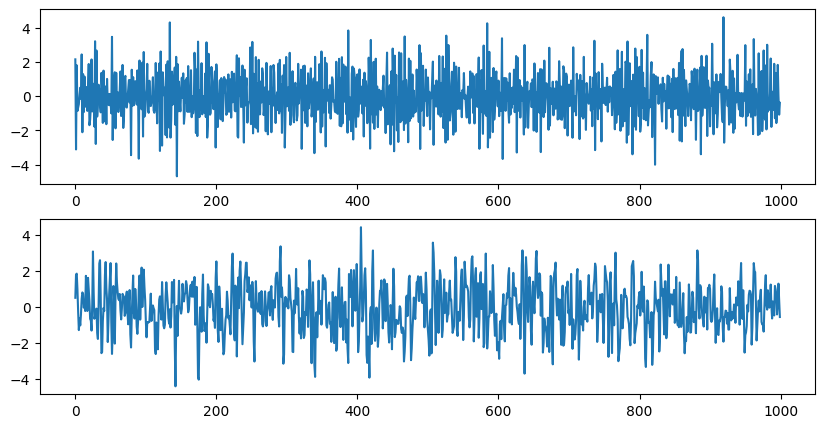

In [5]:
# Grafico 1: MA parametro: -0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
datos_simulados_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(datos_simulados_1);

# Grafico 2: MA parametro: +0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
datos_simulados_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(datos_simulados_2);

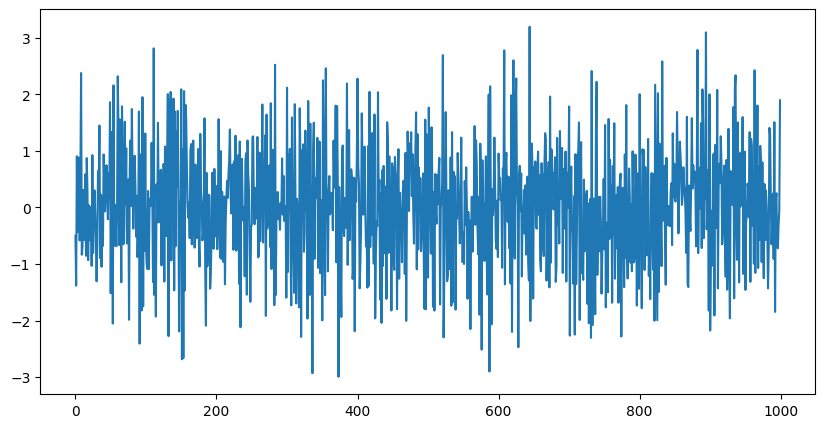

In [6]:
# Grafico 3: MA parametro: -0.3
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
datos_simulados_3 = MA_object3.generate_sample(nsample=1000)
plt.plot(datos_simulados_3);

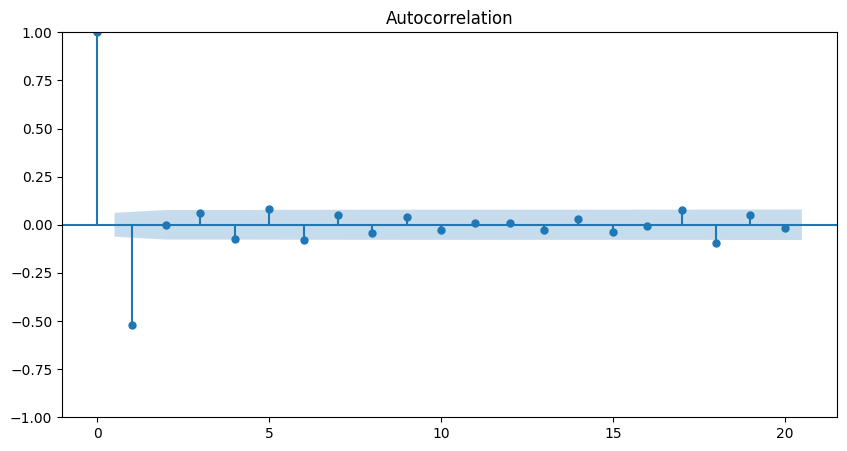

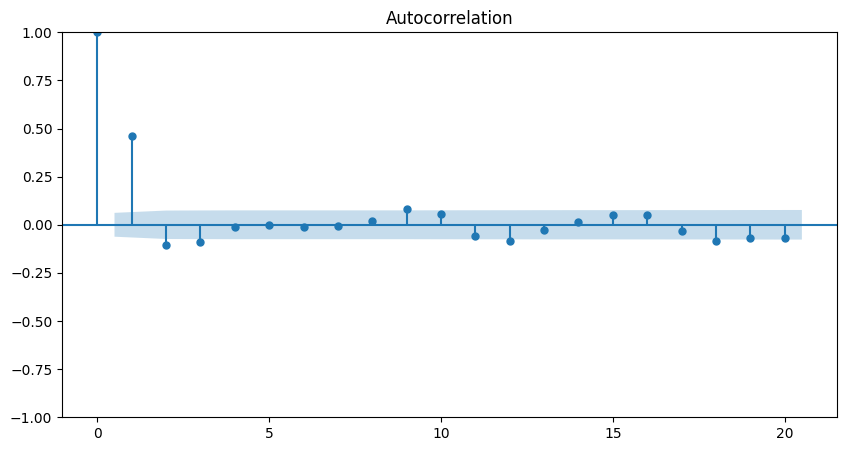

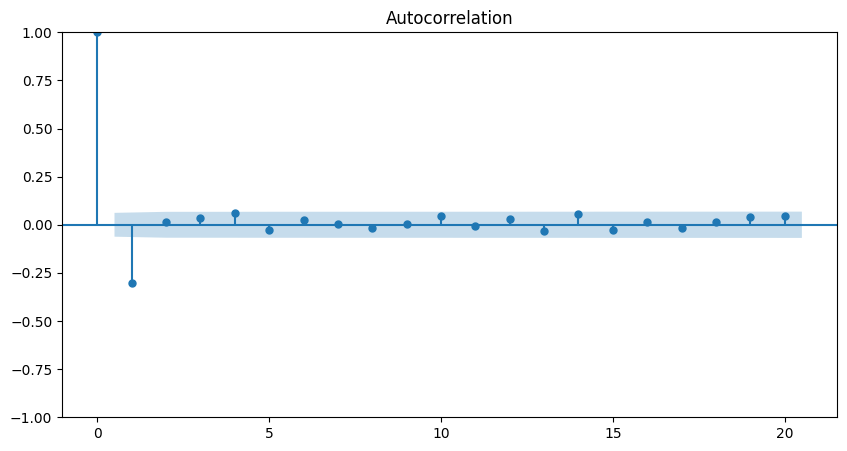

In [7]:
# grafico ACF de los datos simulados 1:
plot_acf(datos_simulados_1, lags=20);

# grafico ACF de los datos simulados 2:
plot_acf(datos_simulados_2, lags=20);

# grafico ACF de los datos simulados 3:
plot_acf(datos_simulados_3, lags=20);

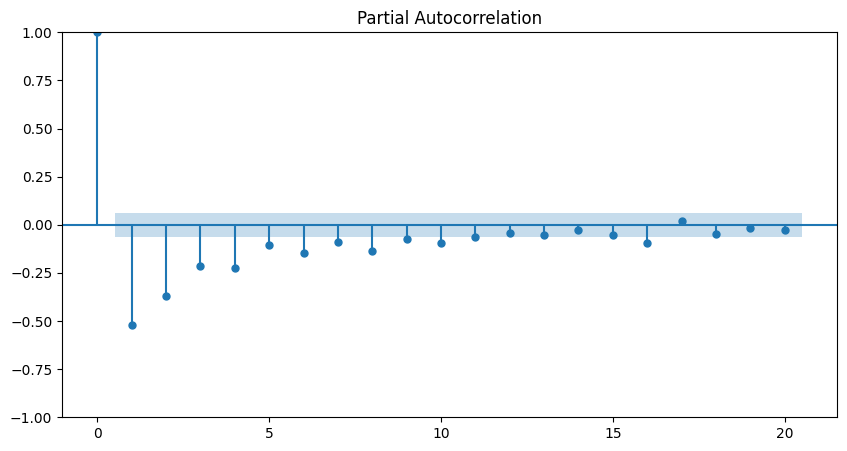

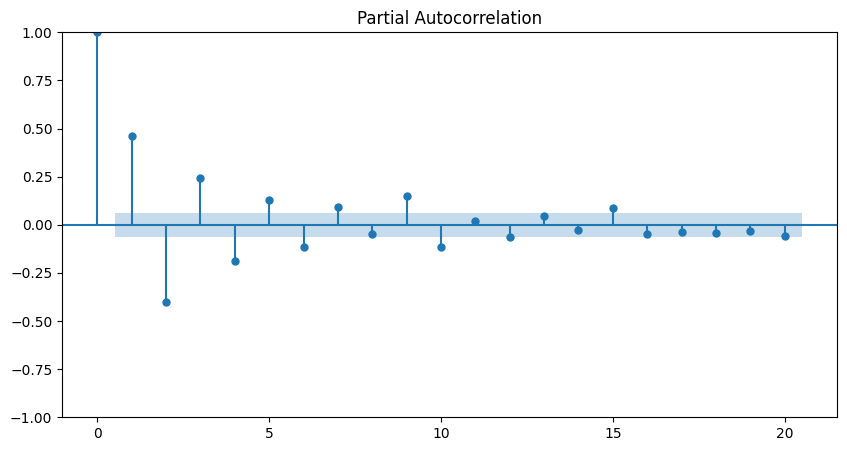

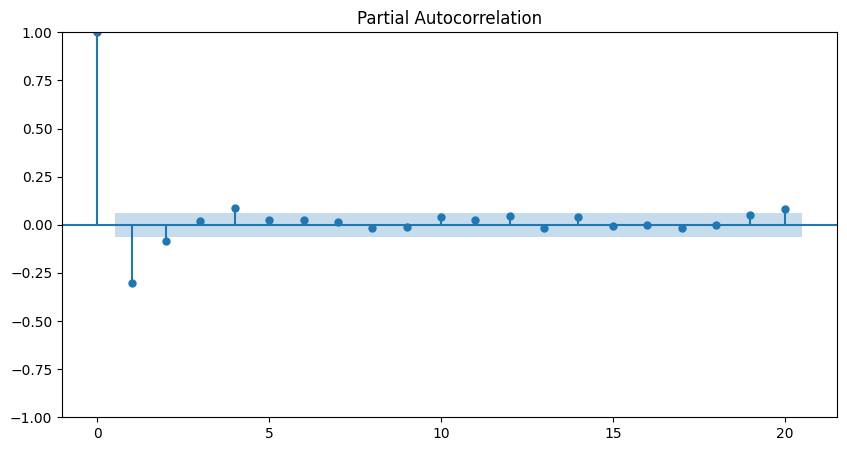

In [8]:
# grafico PACF de los datos simulados 1:
plot_pacf(datos_simulados_1, lags=20);

# grafico PACF de los datos simulados 2:
plot_pacf(datos_simulados_2, lags=20);

# grafico PACF de los datos simulados 3:
plot_pacf(datos_simulados_3, lags=20);

*Aqui* vemos el modelo MA(1) de los simulados 1:

In [9]:
modelo1 = sm.tsa.arima.ARIMA(datos_simulados_1, order=(0,0,1))
resultado1 = modelo1.fit()

resultado1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1470.597
Date:                Sun, 22 Oct 2023   AIC                           2947.195
Time:                        20:50:32   BIC                           2961.918
Sample:                             0   HQIC                          2952.791
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0072      0.003     -2.296      0.022      -0.013      -0.001
ma.L1         -0.9071      0.013    -68.742      0.000      -0.933      -0.881
sigma2         1.1069      0.053     20.873      0.000       1.003       1.211
===================================================================================
Ljung-Box (L1) (Q):                   2.09   Jarque-Bera (JB):                 3.41
Prob(Q):                              0.15   Prob(JB):                         0.18
Heteroskedasticity (H):               0.97   Skew:                             0.07
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AUTO-ARIMA por libreria

In [12]:
stepwise_fit = auto_arima(datos_simulados_1, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2943.510, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3588.468, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3275.787, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2947.195, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3586.497, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2947.943, Time=0.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2948.569, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2944.469, Time=0.72 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2944.330, Time=0.98 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2946.726, Time=0.28 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2948.837, Time=0.76 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2946.332, Time=0.87 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2945.862, Time=0.21 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] i

AUTO-ARIMA manual

In [14]:
# Determinamos los parametros p, d y q
p = d = range(0, 3)
q = range(2)


# Combinacion de los diferentes pamatros para luego probar
pdq = list(itertools.product(p, d, q))


# Inicializa para el loop, con el primer modelo que genera

loopinicial = sm.tsa.arima.ARIMA(datos_simulados_1, order=(0,0,0))
loopinicialresult = loopinicial.fit()
RESULTADOAIC = loopinicialresult.aic

orden=[]

# Iniciamos el loop
for param in pdq:

  mod = ARIMA(datos_simulados_1, order=(param))
  results = mod.fit()

  if results.aic < RESULTADOAIC:
    RESULTADOAIC = results.aic
    orden = param

print(f"El mejor modelo es un ARIMA{orden}, arrojo el menor AIC de = {RESULTADOAIC  } ")


C:\Users\waldo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


El mejor modelo es un ARIMA(1, 0, 1), arrojo el menor AIC de = 2946.726094059176 


# TRABAJAMOS CON LOS DATOS SIMULADOS DEL CASO 2

*Aqui* vemos el modelo MA(1) de los simulados 2:

In [15]:
modelo2_A = sm.tsa.arima.ARIMA(datos_simulados_2, order=(0,0,1))
resultado2A = modelo2_A.fit()

resultado2A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1426.069
Date:                Sun, 22 Oct 2023   AIC                           2858.137
Time:                        20:58:50   BIC                           2872.861
Sample:                             0   HQIC                          2863.733
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0286      0.061     -0.471      0.637      -0.148       0.090
ma.L1          0.9030      0.014     63.912      0.000       0.875       0.931
sigma2         1.0126      0.046     21.949      0.000       0.922       1.103
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 1.83
Prob(Q):                              0.73   Prob(JB):                         0.40
Heteroskedasticity (H):               1.05   Skew:                            -0.10
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*Aqui* vemos el modelo MA teniendo en cuenta los lags 1,12 y 13 de los simulados 2:

In [16]:
modelo2_B = sm.tsa.arima.ARIMA(datos_simulados_2, order=(0,0,(1,0,0,0,0,0,0,0,0,0,0,1,1)))
resultado2B = modelo2_B.fit()

resultado2B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:                            y   No. Observations:                 1000
Model:             ARIMA(0, 0, [1, 12, 13])   Log Likelihood               -1424.391
Date:                      Sun, 22 Oct 2023   AIC                           2858.781
Time:                              20:59:21   BIC                           2883.320
Sample:                                   0   HQIC                          2868.108
                                     - 1000                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0290      0.057     -0.507      0.612      -0.141       0.083
ma.L1          0.8979      0.015     58.292      0.000       0.868       0.928
ma.L12        -0.0575      0.032     -1.774      0.076      -0.121       0.006
ma.L13        -0.0467      0.031     -1.490      0.136      -0.108       0.015
sigma2         1.0092      0.046     21.931      0.000       0.919       1.099
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.54
Prob(Q):                              0.77   Prob(JB):                         0.46
Heteroskedasticity (H):               1.04   Skew:                            -0.09
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*Aqui* vemos el modelo MA teniendo en cuenta los lags 1 y 13 de los simulados 2:

In [17]:
modelo2_C = sm.tsa.arima.ARIMA(datos_simulados_2, order=(0,0,(1,0,0,0,0,0,0,0,0,0,0,0,1)))
resultado2C = modelo2_C.fit()

resultado2C.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                 1000
Model:             ARIMA(0, 0, [1, 13])   Log Likelihood               -1426.005
Date:                  Sun, 22 Oct 2023   AIC                           2860.010
Time:                          20:59:44   BIC                           2879.641
Sample:                               0   HQIC                          2867.472
                                 - 1000                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0286      0.061     -0.470      0.638      -0.148       0.091
ma.L1          0.9019      0.015     61.103      0.000       0.873       0.931
ma.L13         0.0046      0.014      0.327      0.744      -0.023       0.032
sigma2         1.0125      0.046     21.935      0.000       0.922       1.103
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.77   Prob(JB):                         0.41
Heteroskedasticity (H):               1.05   Skew:                            -0.10
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
stepwise_fit = auto_arima(datos_simulados_2, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2856.647, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3439.717, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3204.784, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2858.137, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3438.154, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2858.025, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2857.186, Time=0.21 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2860.088, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2857.402, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2859.965, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2857.029, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2854.915, Time=0.33 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2973.087, Time=0.12 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2856.396, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept

In [19]:
AIC= [resultado2A.aic,resultado2B.aic,resultado2C.aic]
BIC= [resultado2A.bic,resultado2B.bic,resultado2C.aic]
HQIC= [resultado2A.hqic,resultado2B.hqic,resultado2C.aic]

In [20]:
MODELOS = ('Lag 1', 'Lags 1, 12 y 13', 'Lags 1 y 13')
resumen2 = pd.DataFrame({'AIC':AIC, 'BIC': BIC,'HQIC':HQIC}, index=MODELOS)
resumen2.index.name = 'MODELOS'

resumen2.round(4)

,AIC,BIC,HQIC
MODELOS,,,
Lag 1,2858.1375,2872.8607,2863.7333
"Lags 1, 12 y 13",2858.7812,2883.3200,2868.1076
Lags 1 y 13,2860.0104,2860.0104,2860.0104


*Aqui* vemos el modelo MA(1) de los simulados 3:

In [21]:
modelo3 = sm.tsa.arima.ARIMA(datos_simulados_3, order=(0,0,1))
resultado3 = modelo3.fit()

resultado3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1434.561
Date:                Sun, 22 Oct 2023   AIC                           2875.122
Time:                        21:02:17   BIC                           2889.846
Sample:                             0   HQIC                          2880.718
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0320      0.022      1.432      0.152      -0.012       0.076
ma.L1         -0.3044      0.032     -9.543      0.000      -0.367      -0.242
sigma2         1.0316      0.048     21.451      0.000       0.937       1.126
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.04
Prob(Q):                              0.58   Prob(JB):                         0.60
Heteroskedasticity (H):               1.10   Skew:                            -0.00
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
stepwise_fit = auto_arima(datos_simulados_3, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2869.079, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2971.019, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2878.471, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2875.122, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2969.936, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2868.796, Time=0.38 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2873.977, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2874.988, Time=0.17 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2869.536, Time=0.37 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2869.698, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2875.290, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2866.490, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2873.857, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : 

FIN DEL CODIGO - GRACIAS